In [1]:
#2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
#LOADING DATASET

In [4]:
# We are seeing that our dataset has no headers. Hence we are using names field for adding the headers(given as per Q) while reading the dataset

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",names=['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_Type'])

In [6]:
df.shape

(214, 11)

In [7]:
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id_number   214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_Type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [9]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
# There are no null values
#Na,K,Ca,Ba and Fe has a sudden increase in its compositiion as the glass type increase.Specifically Na,K and Ca has a major impact on non window glass.
#This means it is highly positively correlated with non window glass type. Not to forget about outliers.
#Id_number is nominal and hence will drop it.
#An increase in K changes the building glass to vehicle glass
# Data is majorly distributed in window glass. Less data concentration for non window glass.


In [11]:
df['Glass_Type'].value_counts()
#We see the data is imbalanced. we will balance this for a correct model prediction

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_Type, dtype: int64

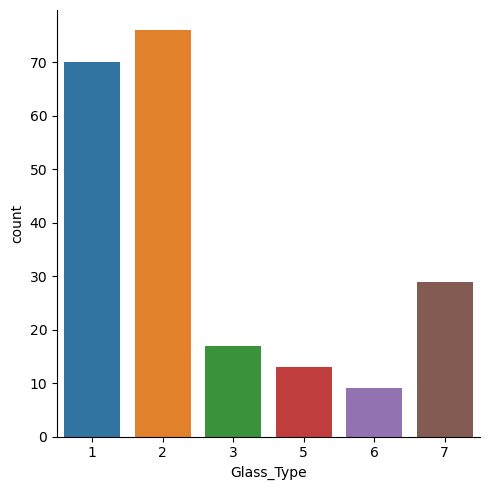

In [12]:
sns.catplot(x='Glass_Type',data=df,kind='count')

In [13]:
#To understand the data much better, 
#we will encode based on the classification of window if glass type is>=4 else non window glass.

In [14]:
y=df['Glass_Type'].apply(lambda y_value: 1 if y_value<=4 else 0)
y[150:170]

150    1
151    1
152    1
153    1
154    1
155    1
156    1
157    1
158    1
159    1
160    1
161    1
162    1
163    0
164    0
165    0
166    0
167    0
168    0
169    0
Name: Glass_Type, dtype: int64

UNIVARIATE PLOT

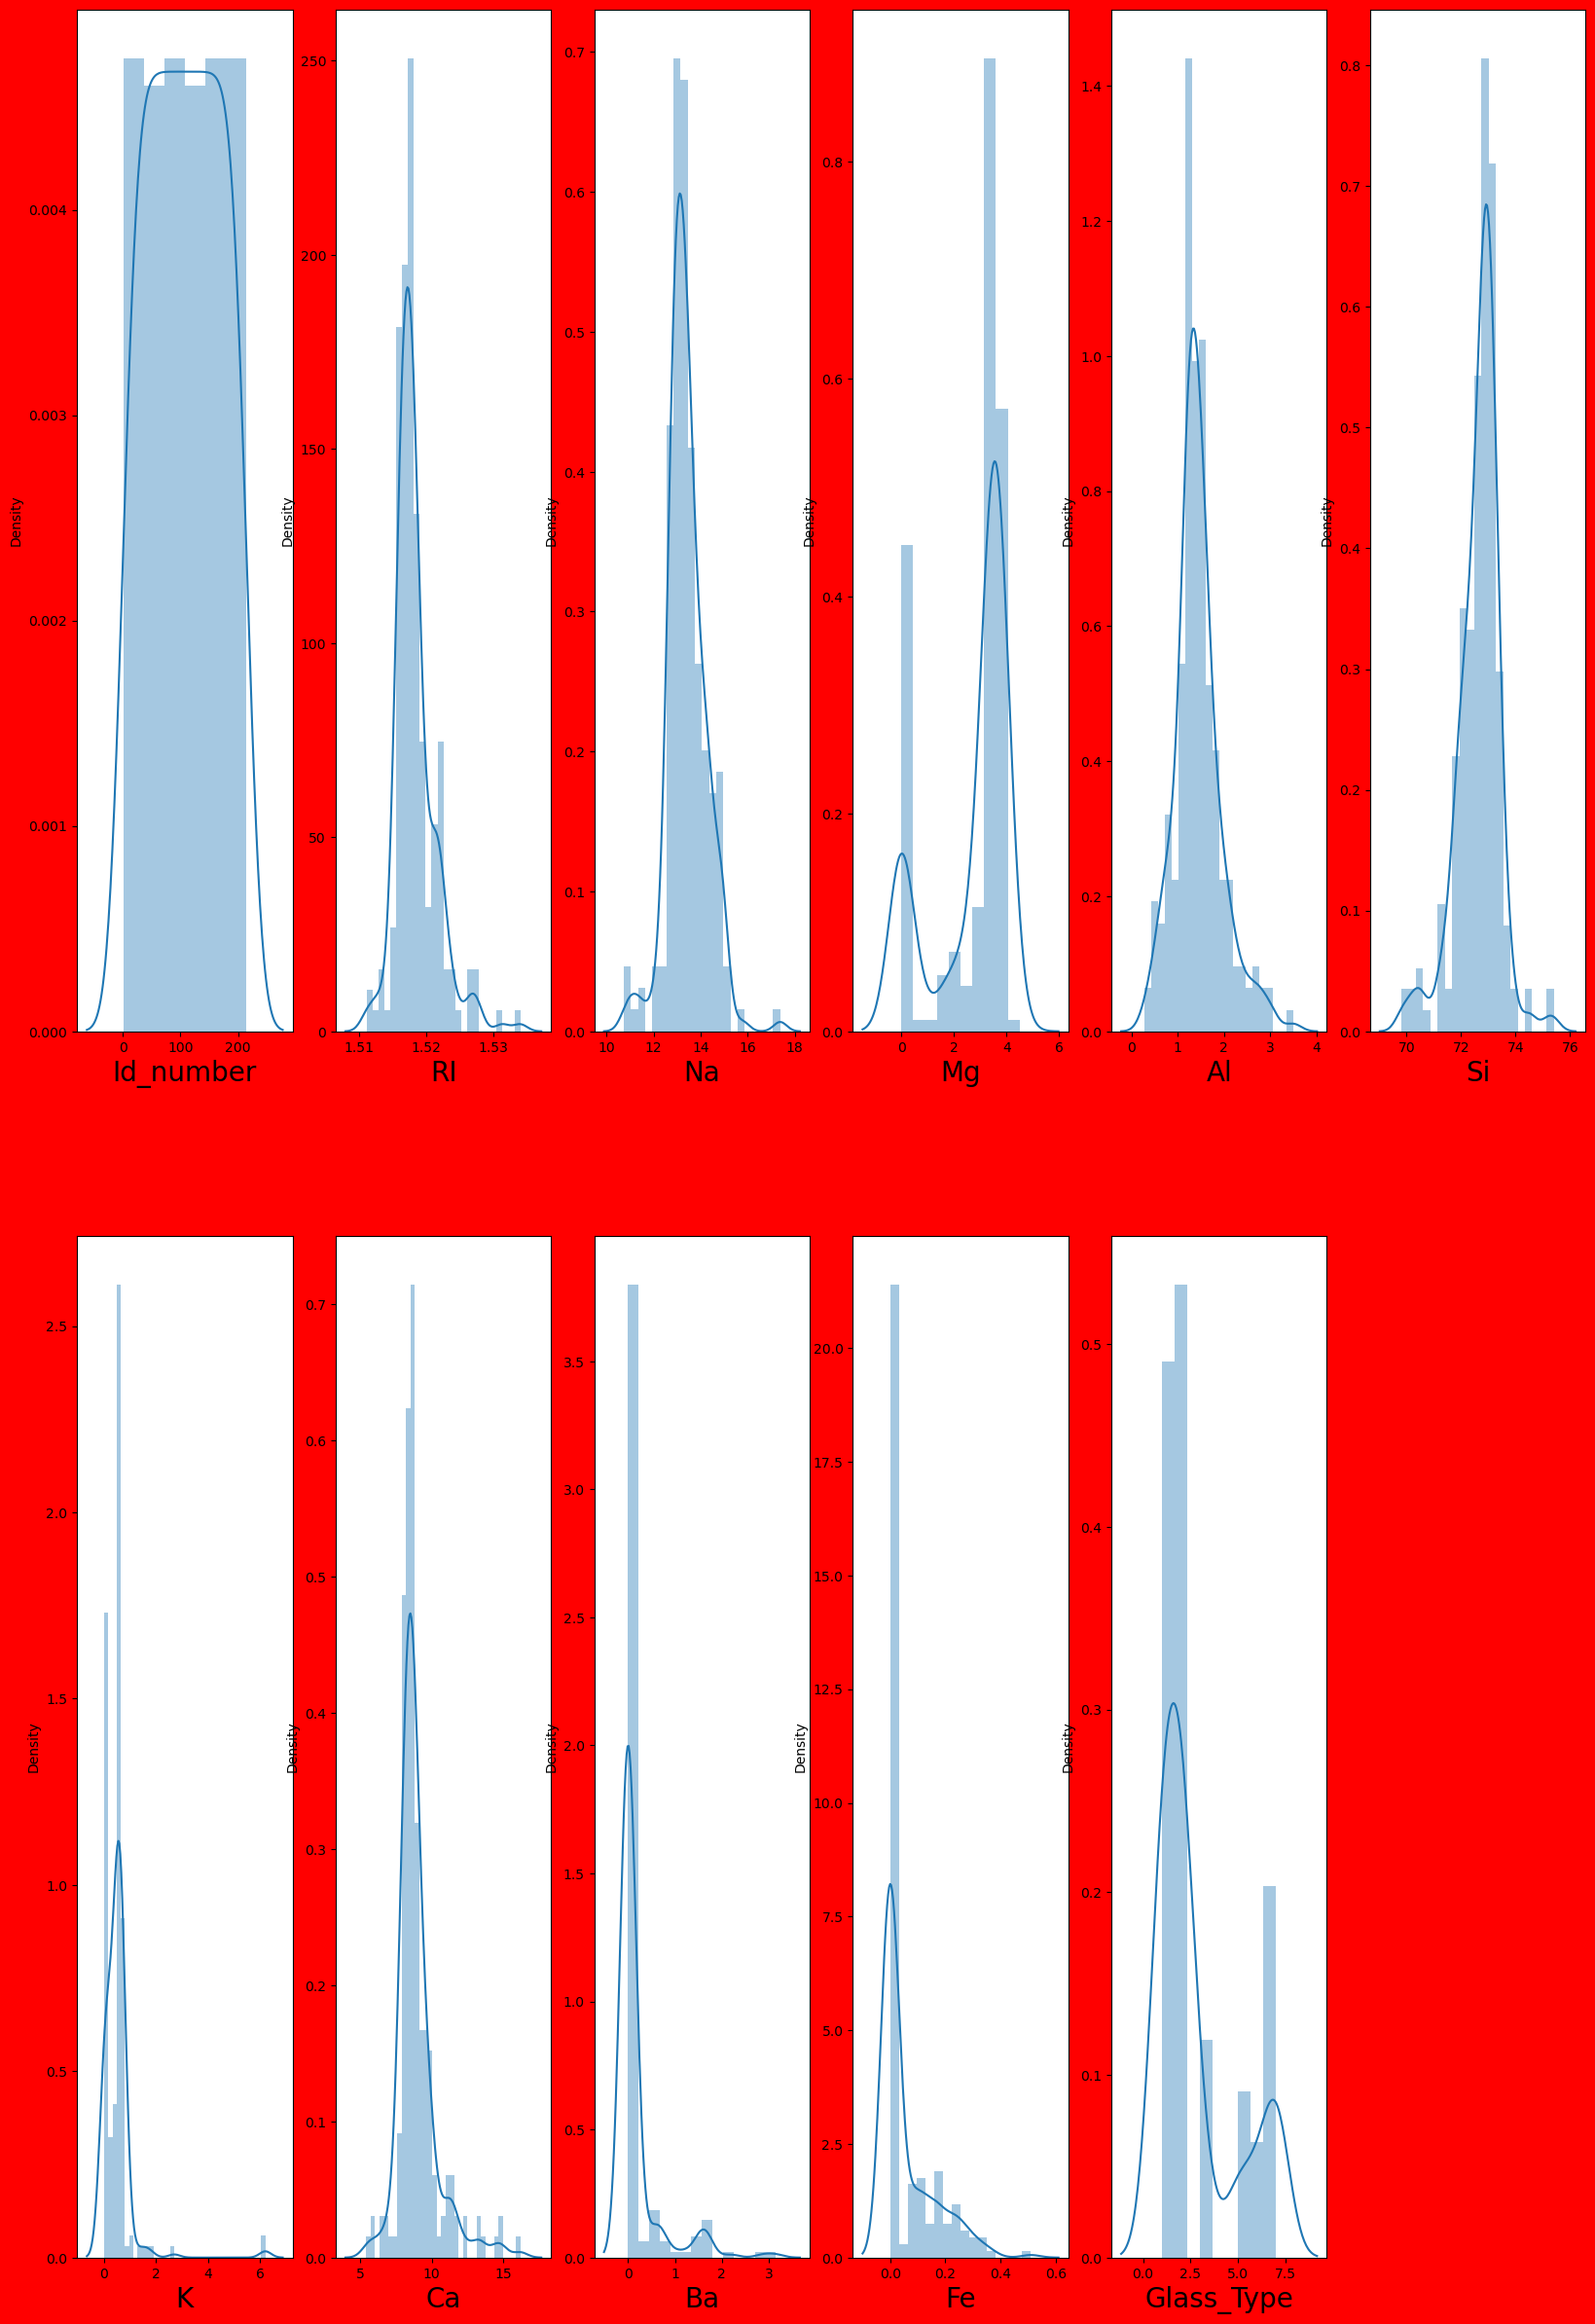

In [15]:
plot=plt.figure(figsize=(20,30), facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
        
plt.show()  

In [16]:
df.skew()
#we see skewness which can be due to outliers too.

Id_number     0.000000
RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754327
Glass_Type    1.114915
dtype: float64

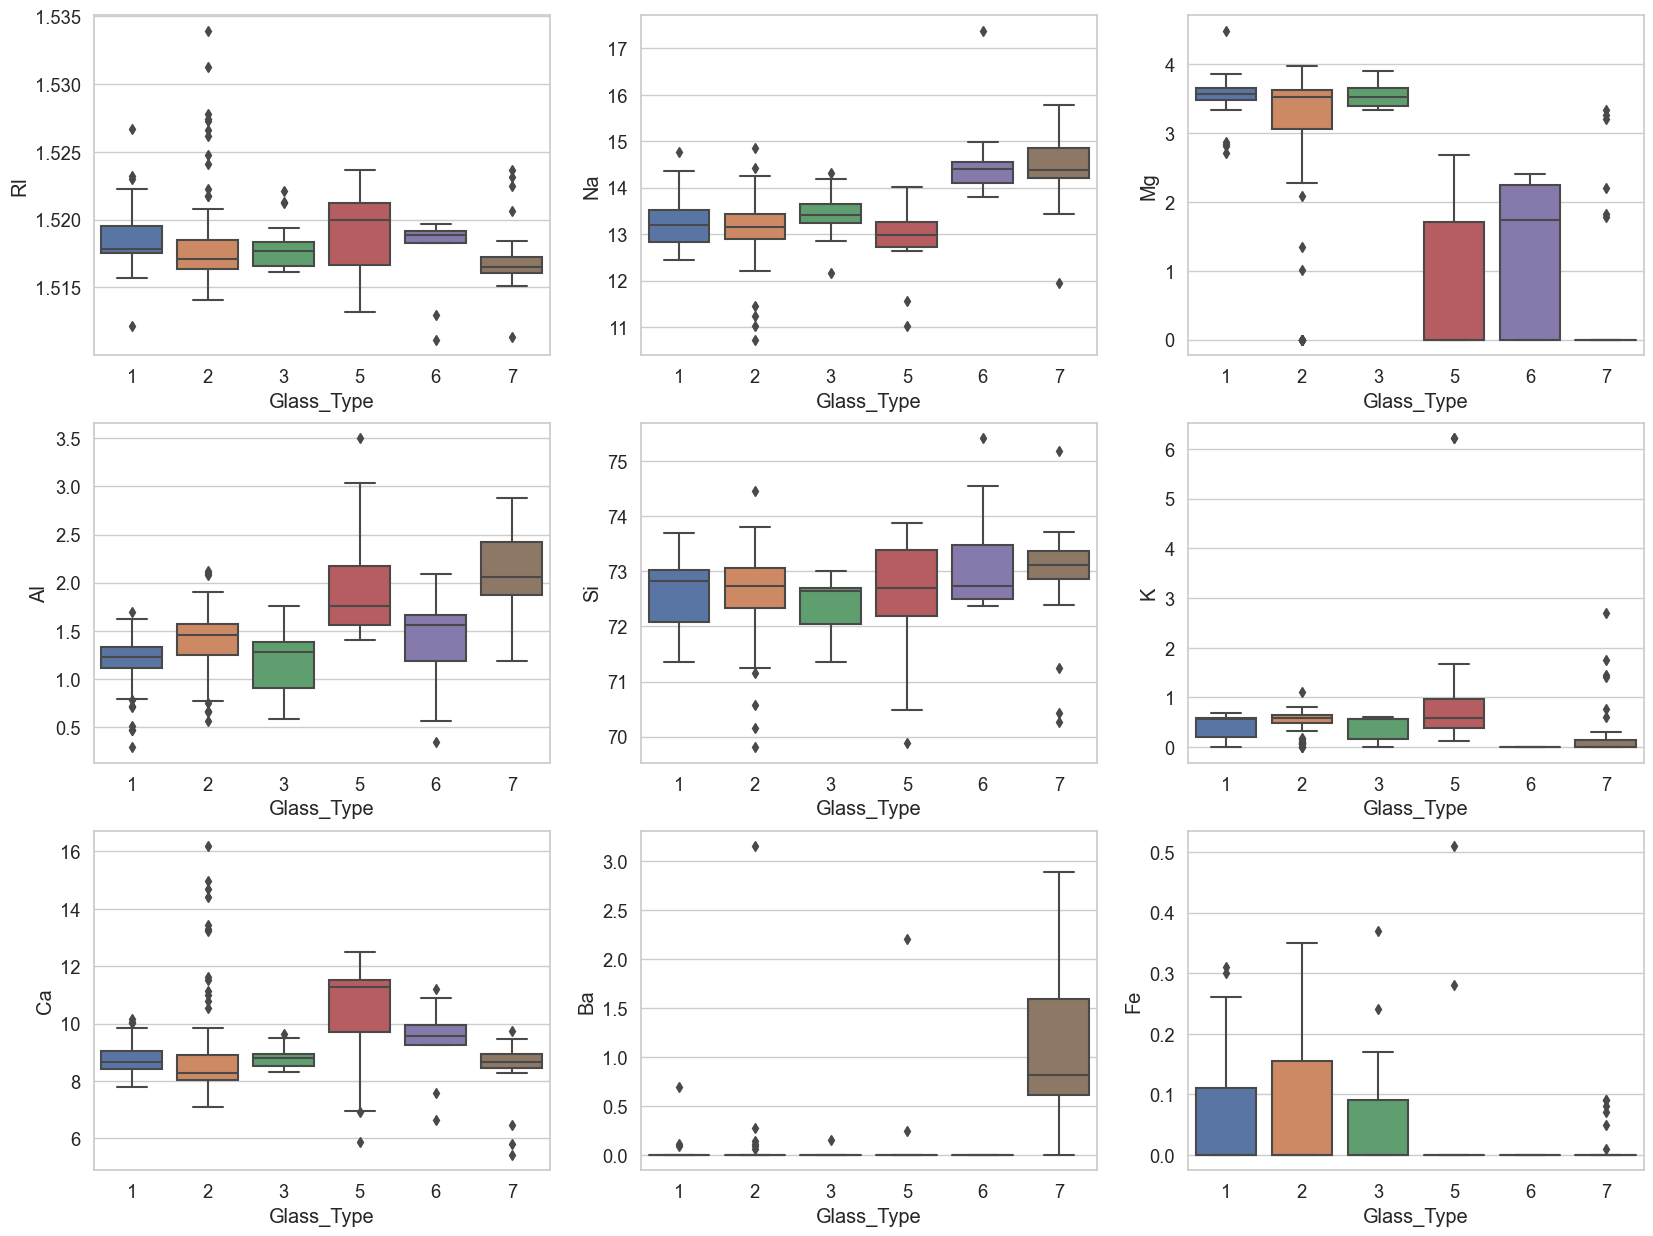

In [17]:
# create box plots for each feature V/s Target

sns.set(style="whitegrid", font_scale=1.2) 
plt.subplots(figsize = (20,15)) 
plt.subplot(3,3,1) 
sns.boxplot(x='Glass_Type', y='RI', data=df) 
plt.subplot(3,3,2) 
sns.boxplot(x='Glass_Type', y='Na', data=df) 
plt.subplot(3,3,3) 
sns.boxplot(x='Glass_Type', y='Mg', data=df) 
plt.subplot(3,3,4) 
sns.boxplot(x='Glass_Type', y='Al', data=df) 
plt.subplot(3,3,5) 
sns.boxplot(x='Glass_Type', y='Si', data=df) 
plt.subplot(3,3,6) 
sns.boxplot(x='Glass_Type', y='K', data=df) 
plt.subplot(3,3,7) 
sns.boxplot(x='Glass_Type', y='Ca', data=df) 
plt.subplot(3,3,8) 
sns.boxplot(x='Glass_Type', y='Ba', data=df) 
plt.subplot(3,3,9) 
sns.boxplot(x='Glass_Type', y='Fe', data=df) 
plt.show()

We see the RI is more or less same in all types
Na is high in 6 and 7 which substantiates our previuos understanding
Mg is used more in window glass of building n vehicles(easy to break)
Al is more in 5
Si again is more or less same 
K and Ca is highest in 5 
so containers use more al and k and Ca
Ba is fully used in 7 or in making headlamps
Fe is hardly used in 5,6 and 7 and 1,2 n 3 iron is used not much
We did this to understand which feature helps us to predict which type


MULTIVARIATE PLOTTING

<Figure size 800x800 with 0 Axes>

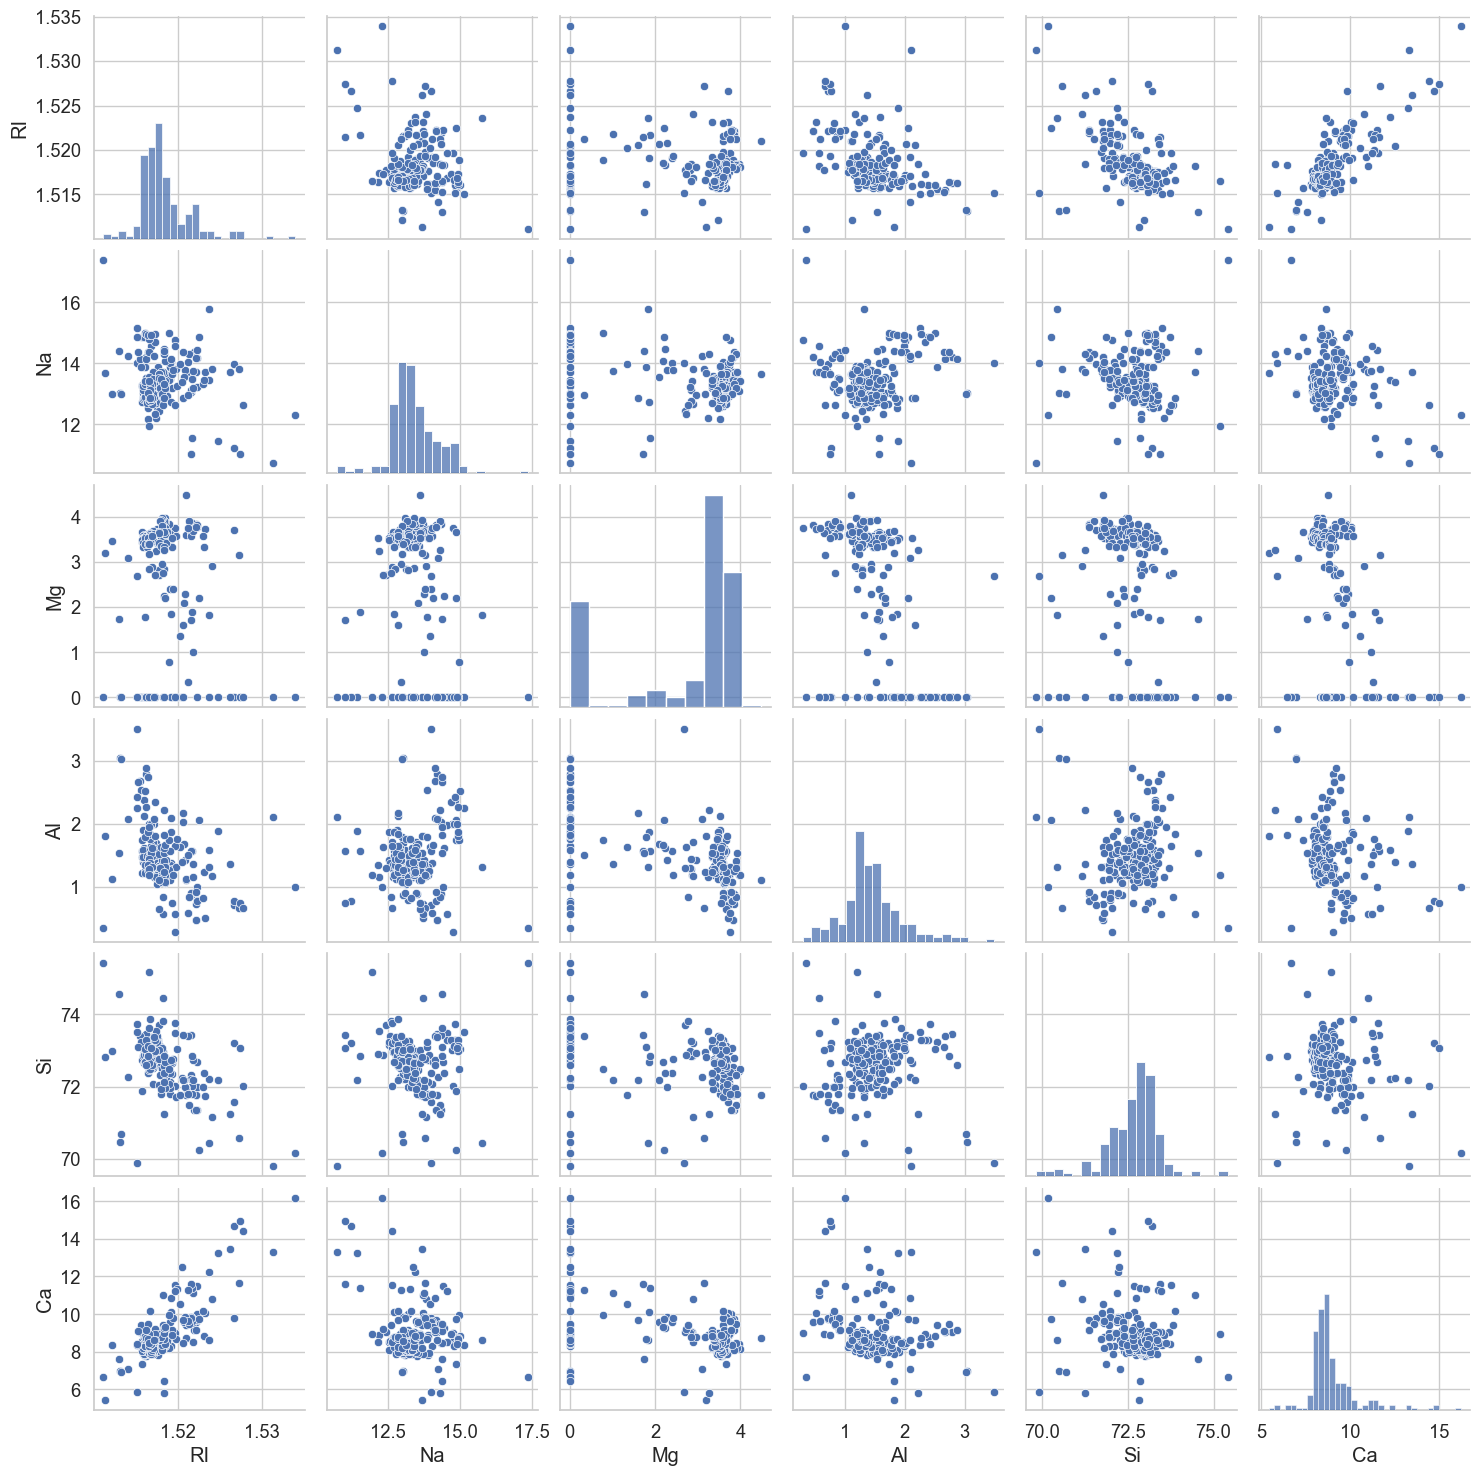

In [18]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ca']], palette='coolwarm')
plt.show()


In [19]:
#We see RI and Ca are positively correlated whereas Na and RI are negatively correalted. We can further understand this thru heatmap

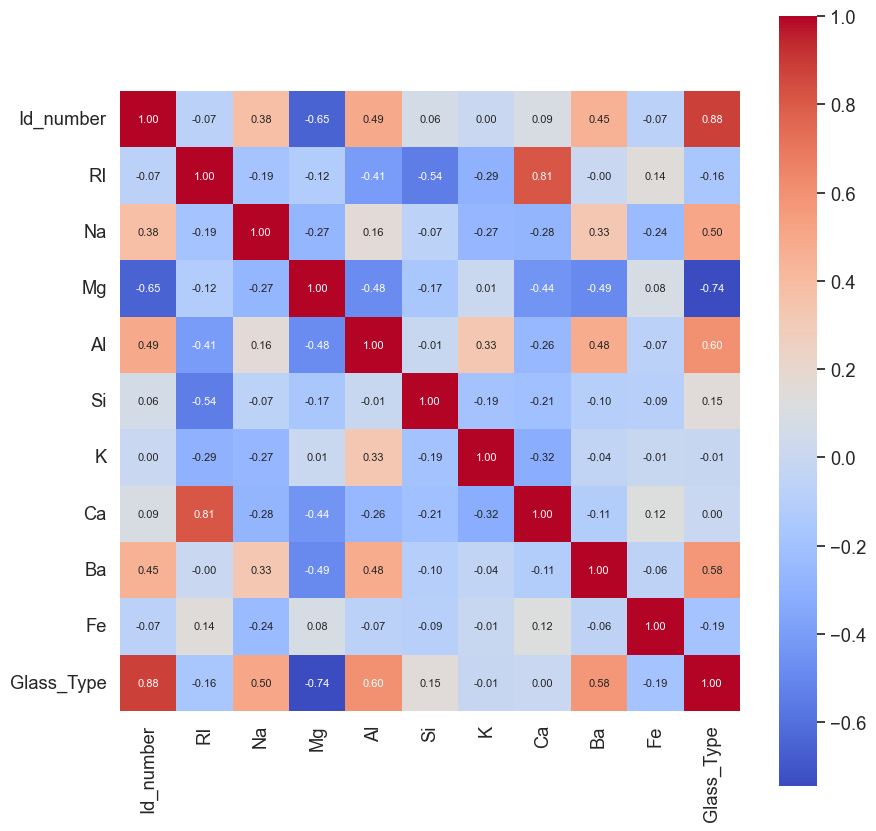

In [20]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={"size":8},cmap="coolwarm")
plt.show()

In [21]:
#As we deduced that RI n Ca are highly correlated.Ba and Al are also having a positive correlation. This could lead to curse of dimensionality. Hence we will perform PCA
#we see negative correlations Si and RI and Ba and Mg.

In [22]:
features=df.columns[:-1].tolist()# Features is made

In [23]:
#Defining a function for removing outliers using IQR formulas

def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df=mod_outlier(df)
        
       

In [24]:
#We will remove outliers from our df

                      P1   P2    P3    P4    P5    P6    P7   P8   P9
Explained_Variance  2.33  0.8  0.58  0.28  0.08  0.03  0.01  0.0  0.0


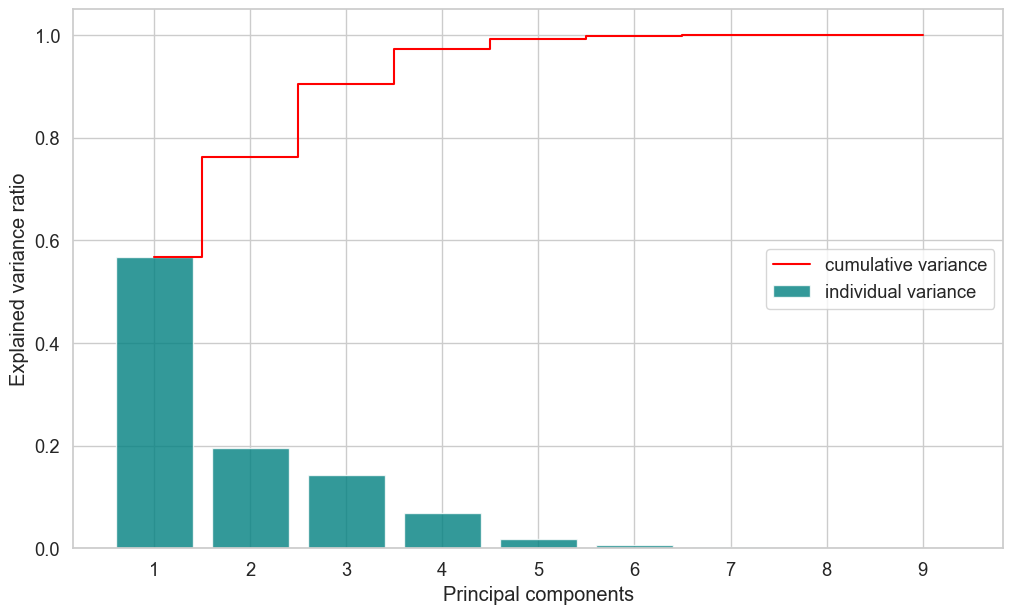

In [25]:
# Performing PCA
from sklearn.decomposition import PCA
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [26]:
X=df.drop(columns=['Id_number','Glass_Type'],axis=1)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


In [27]:
y=df['Glass_Type']

In [28]:

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
x


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,0.0,-0.619091
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,0.0,-0.619091
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,0.0,-0.619091
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,0.0,-0.619091


In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=7)

In [31]:

print(y.shape,y_train.shape,y_test.shape)

(214,) (149,) (65,)


MODEL BUILDING AND MODEL ACCURACY

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['LogisticRegression',accuracy_score(y_test,y_pred)]
model_result

['LogisticRegression', 0.6461538461538462]

In [33]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['KNeighborsClassifier',accuracy_score(y_test,y_pred)]
model_result

['KNeighborsClassifier', 0.6923076923076923]

In [34]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['Support Vector',accuracy_score(y_test,y_pred)]
model_result

['Support Vector', 0.3076923076923077]

In [35]:
rfcmodel=RandomForestClassifier()
rfcmodel.fit(X_train,y_train)
y_pred=rfcmodel.predict(X_test)
rfcmodel_result=['RANDOM FOREST CLASSIFIER',accuracy_score(y_test,y_pred)]
rfcmodel_result

['RANDOM FOREST CLASSIFIER', 0.7692307692307693]

In [44]:
#we see RFC is best . Hence we will further hyper tune it and see whether it will give better accuracy

In [36]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

In [38]:
score=cross_val_score(rfcmodel,X,y)
print(score)
print(score.mean())

[0.74418605 0.62790698 0.65116279 0.60465116 0.78571429]
0.6827242524916943


In [39]:
#HYPERPARAMETER TUNING

In [40]:
param={'criterion':['gini','entropy'],
            'random_state':[10,50,200],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [41]:
clf=RandomForestClassifier(n_estimators=50)
random_search = RandomizedSearchCV(clf, param_distributions=param,n_iter=20, cv=5) 

In [42]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 10, 20],
                                        'n_estimators': [50, 100, 200, 300],
                                        'n_jobs': [-2, -1, 1],
                                        'random_state': [10, 50, 200]})

In [43]:
best_parameters=random_search.best_params_
print(best_parameters)

{'random_state': 200, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 20, 'criterion': 'entropy'}


In [45]:
model=RandomForestClassifier(random_state= 200, n_jobs= -1, n_estimators= 100, max_depth= 20, criterion= 'entropy')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['RandomForestClassifier',accuracy_score(y_test,y_pred)]
model_result

['RandomForestClassifier', 0.7538461538461538]

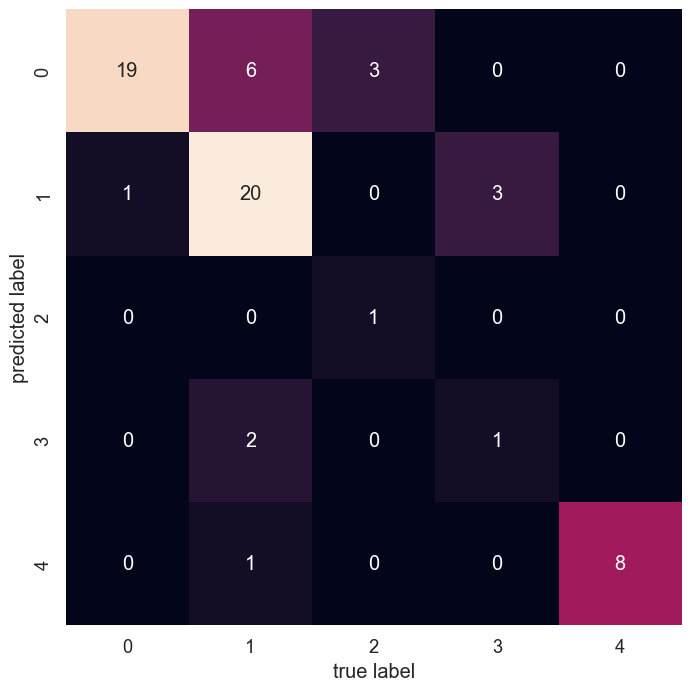

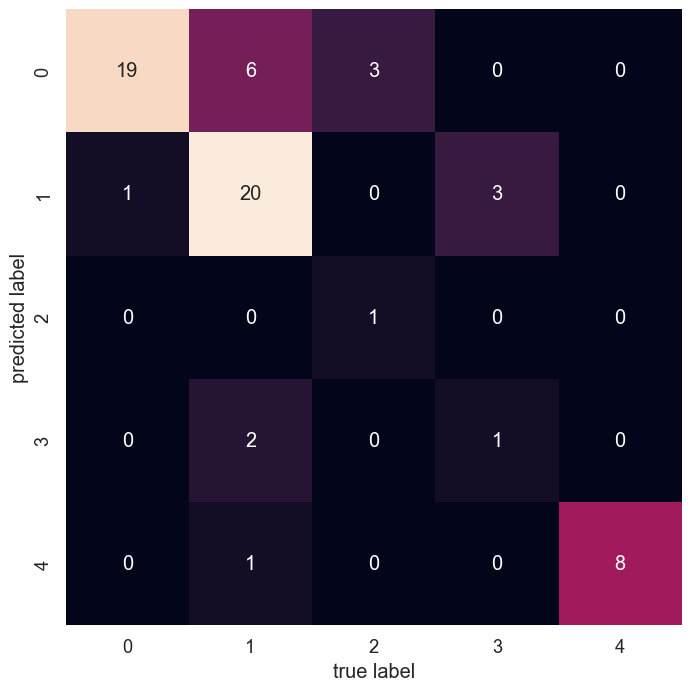

In [47]:

# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.95      0.79        20
           2       0.83      0.69      0.75        29
           3       1.00      0.25      0.40         4
           5       0.33      0.25      0.29         4
           6       0.89      1.00      0.94         8

    accuracy                           0.75        65
   macro avg       0.75      0.63      0.63        65
weighted avg       0.77      0.75      0.74        65



In [51]:
df.iloc[200]

Id_number     201.00000
RI              1.51508
Na             15.15000
Mg              0.00000
Al              2.25000
Si             73.50000
K               0.00000
Ca              8.34000
Ba              0.00000
Fe              0.00000
Glass_Type      6.00000
Name: 200, dtype: float64

In [52]:
data={'RI':1.51508,'Na':15.15,'Mg':0.00,'Al':2.25,'Si':73.5,'K':0,'Ca':8.34,'Ba':0,'Fe':0}
index=[0]
df1=pd.DataFrame(data,index)
df1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51508,15.15,0.0,2.25,73.5,0,8.34,0,0


In [53]:
pred_random=rfcmodel.predict(df1)
pred_random

array([6], dtype=int64)

In [54]:
#The result shows that based on our imputs the glass type is 6. This means our model has predicted accurately.

In [55]:
#THANK YOU